NAME:SRUTHI S
REG NO:19MID0053

# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import *


# Importing dataset-1

In [2]:
df = pd.read_csv("gradient.csv")
df=genfromtxt('gradient.csv',delimiter=',')

# Assigning X and Y values

In [3]:
x = array(df[:,0])
y = array(df[:,1])


In [4]:
x

array([20. , 21. , 22. , 30. , 28. , 23. , 24. , 30. , 22.2, 22. , 33. ,
       34. , 36. , 37. , 38. , 22. , 24. , 21. , 20. , 32. , 22. , 21. ,
       22. , 21. , 22. , 22. , 22. , 23. , 23. , 23. ])

In [5]:
y

array([ 10000.,  15000.,  20000.,  70000.,  50000.,  34023.,  43202.,
        73023.,  15000.,  17754.,  80000.,  82000.,  96066., 105043.,
       132022.,  23455.,  23324.,  17343.,  10344., 100546.,   9376.,
        24335.,  23234.,   9444.,   9233.,   5433.,  22231.,  13456.,
         2331.,   7543.])

# Scatter plot

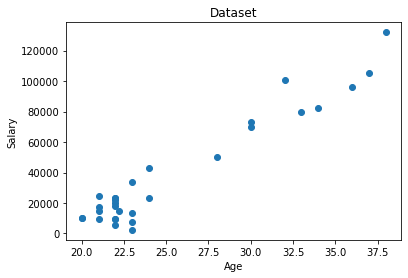

In [6]:
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Dataset")
plt.show()

# Cost function

In [7]:
#cost function
def compute_cost(c,m,df):
    total_cost=0
    #numbers of datapoints in training data
    N=float(len(df))
    
    #compute sum of squared errors
    for i in range(0,len(df)):
        x=df[i,0]
        y=df[i,1]
        total_cost +=(y-(m*x+c))**2
    
    #return average of squared error
    return total_cost/(N)

# Setting hyperparameters

In [12]:
#hyperparameters
learning_rate=0.0001
initial_c=0
initial_m=0
num_iterations=1000000

# To repeat steps-step gradient

In [13]:
def step_gradient(c_current,m_current,data,lr):
    m_gradient=0
    c_gradient=0
    N=float(len(df))
    
    #calculate gradient
    for i in range(0,len(df)):
        x=df[i,0]
        y=df[i,1]
        m_gradient+= -(2/N)*x*(y-(m_current*x+c_current))
        c_gradient+= -(2/N)*(y-(m_current*x+c_current))
        
    #update m and c values:
    m_updated=m_current-lr*m_gradient
    c_updated=c_current-lr*c_gradient
    
    #return updated parameters:
    return c_updated,m_updated

# Gradient descent definition

In [14]:
def gradient_descent(df,starting_c,starting_m,learning_rate,num_iterations):
    
    #initial values:
    c=starting_c
    m=starting_m
    
    #to store cost after each iterations:
    cost_graph=[]
    
    
    c_progress=[]
    m_progress=[]
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(c,m,df))
        c,m=step_gradient(c,m,df,learning_rate)
        c_progress.append(c)
        m_progress.append(m)
    return[c,m,cost_graph,c_progress,m_progress]

In [15]:
c,m,cost_graph,c_progress,m_progress=gradient_descent(df,initial_c,initial_m,learning_rate,num_iterations)
print('optimized c:',c)
print('optimized m:',m)
print('minimized cost:',compute_cost(c,m,df))

optimized c: -120583.77245066041
optimized m: 6264.531340419822
minimized cost: 92763646.46410993


# cost graph

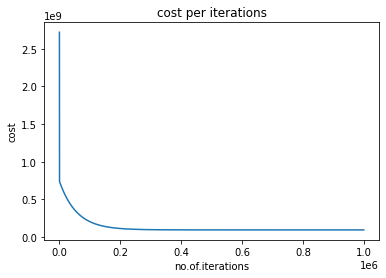

In [16]:
plt.plot(cost_graph)
plt.xlabel('no.of.iterations')
plt.ylabel('cost')
plt.title('cost per iterations')
plt.show()

# Scatter plot with best fit line

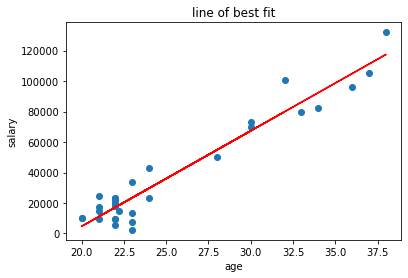

In [17]:
plt.scatter(x,y)
pred=m*x+c
plt.plot(x,pred,c='r')
plt.xlabel('age')
plt.ylabel('salary')
plt.title('line of best fit')
plt.show()

# Importing dataset-2

In [18]:
import urllib
df = urllib.request.urlretrieve('https://raw.githubusercontent.com/CC-MNNIT/2018-19-Classes/master/MachineLearning/2018_08_22_Logical-Rhythm-2/data.csv', "data.csv")
df

('data.csv', <http.client.HTTPMessage at 0x7d00f74250>)

# Assigning x and y values

In [19]:
df = np.genfromtxt("data.csv", delimiter=',')
x = df[:,0]
y = df[:,1]

In [20]:
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

In [21]:
y

array([ 31.70700585,  68.77759598,  62.5623823 ,  71.54663223,
        87.23092513,  78.21151827,  79.64197305,  59.17148932,
        75.3312423 ,  71.30087989,  55.16567715,  82.47884676,
        62.00892325,  75.39287043,  81.43619216,  60.72360244,
        82.89250373,  97.37989686,  48.84715332,  56.87721319,
        83.87856466, 118.5912173 ,  57.25181946,  51.39174408,
        75.38065167,  74.76556403,  95.45505292,  95.22936602,
        79.05240617,  83.43207142,  63.35879032,  41.4128853 ,
        76.61734128,  96.76956643,  74.08413012,  66.58814441,
        77.76848242,  50.71958891,  62.12457082,  60.81024665,
        52.68298337,  58.56982472,  82.90598149,  61.4247098 ,
       115.2441528 ,  45.57058882,  54.0840548 ,  87.99445276,
        52.72549438,  93.57611869,  80.16627545,  65.10171157,
        65.56230126,  65.28088692,  73.43464155,  71.13972786,
        79.10282968,  86.52053844,  84.74269781,  59.35885025,
        61.68403752,  69.84760416,  86.09829121,  59.10

# Scatter plot

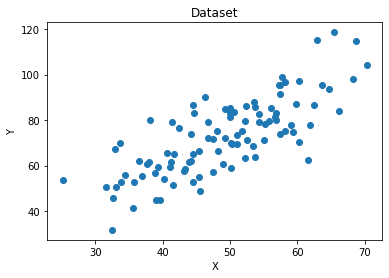

In [22]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset")
plt.show()

# Cost function

In [23]:
#cost function
def compute_cost(c,m,df):
    total_cost=0
    #numbers of datapoints in training data
    N=float(len(df))
    
    #compute sum of squared errors
    for i in range(0,len(df)):
        x=df[i,0]
        y=df[i,1]
        total_cost +=(y-(m*x+c))**2
    
    #return average of squared error
    return total_cost/(N)

# To repeat steps-step gradient

In [24]:
def step_gradient(c_current,m_current,data,lr):
    m_gradient=0
    c_gradient=0
    N=float(len(df))
    
    #calculate gradient
    for i in range(0,len(df)):
        x=df[i,0]
        y=df[i,1]
        m_gradient+= -(2/N)*x*(y-(m_current*x+c_current))
        c_gradient+= -(2/N)*(y-(m_current*x+c_current))
        
    #update m and c values:
    m_updated=m_current-lr*m_gradient
    c_updated=c_current-lr*c_gradient
    
    #return updated parameters:
    return c_updated,m_updated

# Gradient descent definition

In [25]:
def gradient_descent(df,starting_c,starting_m,learning_rate,num_iterations):
    
    #initial values:
    c=starting_c
    m=starting_m
    
    #to store cost after each iterations:
    cost_graph=[]
    
    
    c_progress=[]
    m_progress=[]
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(c,m,df))
        c,m=step_gradient(c,m,df,learning_rate)
        c_progress.append(c)
        m_progress.append(m)
    return[c,m,cost_graph,c_progress,m_progress]

In [26]:
c,m,cost_graph,c_progress,m_progress=gradient_descent(df,initial_c,initial_m,learning_rate,num_iterations)
print('optimized c:',c)
print('optimized m:',m)
print('minimized cost:',compute_cost(c,m,df))

optimized c: 7.986822773189421
optimized m: 1.3225135372757009
minimized cost: 110.25738413161343


# cost graph

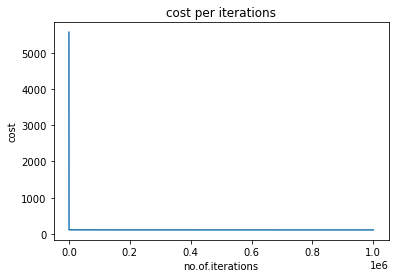

In [27]:
plt.plot(cost_graph)
plt.xlabel('no.of.iterations')
plt.ylabel('cost')
plt.title('cost per iterations')
plt.show()

# Scatter plot with best fit line

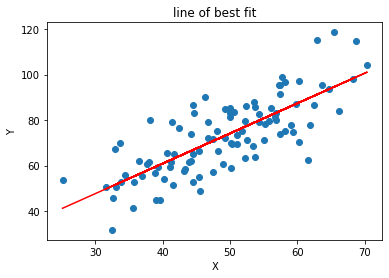

In [28]:
plt.scatter(x,y)
pred=m*x+c
plt.plot(x,pred,c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('line of best fit')
plt.show()